In [11]:
CUBE_WIDTH=3
IMG_PATH="./gridimg.png"


### Load Image

Loaded a (1152, 1152) PNG image in RGBA mode


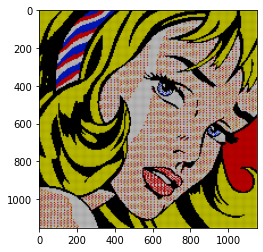

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open(img_path)
 
# summarize some details about the image
print('Loaded a {size} {frmt} image in {mode} mode'.format(frmt=image.format, size=image.size, mode=image.mode))
plt.imshow(image)
plt.show()

Note it's in RGBA mode, we don't want an alpha channel

### Remove Alpha Channel

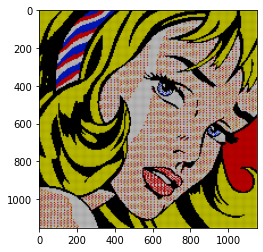

In [13]:
image=image.convert("RGB")
plt.imshow(image)
plt.show()

Looks fine after removing alpha

### Convert to Matrix

Now a (1152, 1152, 3) matrix


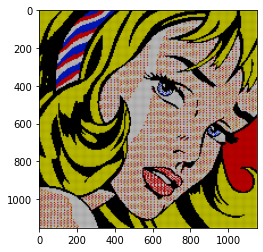

In [14]:
from numpy import asarray
M = asarray(image)
print('Now a {shape} matrix'.format(shape=M.shape))
plt.imshow(M)
plt.show()

Looks fine after matrix conversion

### Validate Six Colors
One per cube side

In [15]:
unique_colors=set()
cell_to_string= lambda cell : '{R},{G},{B}'.format(R=cell[0],G=cell[1],B=cell[2])
for row in M:
    for cell in row:
        unique_colors.add(cell_to_string(cell))
        
unique_colors

{'0,0,0', '0,30,255', '255,0,0', '255,150,0', '255,255,0', '255,255,255'}

Good, only six. 
Mappings:
- black:  '0,0,0'
- blue:   '0,30,255'
- red:    '255,0,0'
- orange: '255,150,0'
- yellow: '255,255,0'
- white:  '255,255,255'

### Validate Divisibility by 3x3

In [16]:
x_len, y_len = M.shape[0], M.shape[1]
print('it is {truthy} that x_len divides 3'.format(truthy=(x_len % CUBE_WIDTH == 0)))
print('it is {truthy} that y_len divides 3'.format(truthy=(y_len % CUBE_WIDTH == 0)))

it is True that x_len divides 3
it is True that y_len divides 3


Good, they divide 3. Don't need to drop cells to make cubes fit.

In [25]:
n_cubes = (x_len //  CUBE_WIDTH) * (y_len //  CUBE_WIDTH)
print('We need {n_cubes} cubes'.format(n_cubes=n_cubes))

We need 147456 cubes


### Segmant M into cubes

In [17]:
# x_len // CUBE_WIDTH
# cube_face=M[0:3][0:3]

SyntaxError: cannot assign to operator (2569703047.py, line 1)

### Next Steps

1. IMG matrix to rubiks cube representation
2. Rubiks cube representation back to 